<h1>Test with synthetic data</h1>

In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML

from multifile_analysis import MultifileAnalysis
from multifile_viz import MultifileLDAViz
from lda_generate_data import LdaDataGenerator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h2>1. Generate some synthetic data</h2>

In [2]:
K = 10
n_docs = 100
vocab_size = 200
document_length = 100
copies = 3

alpha = 0.1
beta = 0.01    

In [3]:
gen = LdaDataGenerator(alpha, make_plot=True)

Generating input DF


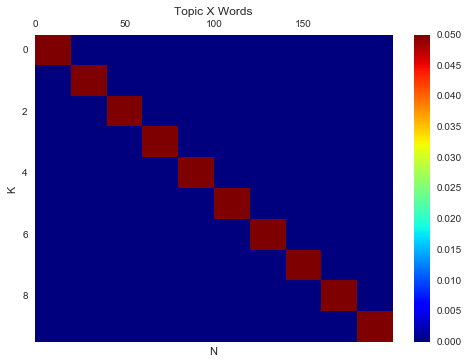

(100, 200)


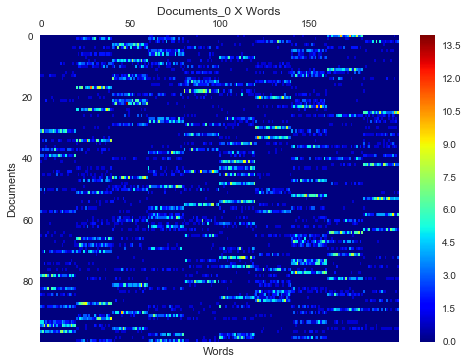

(100, 200)


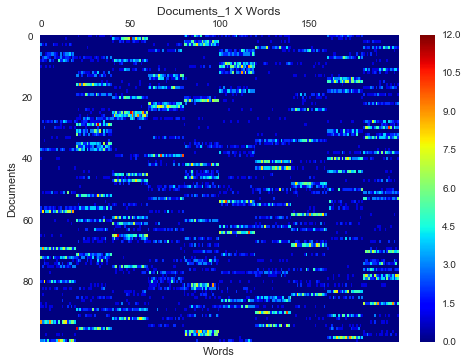

(100, 200)


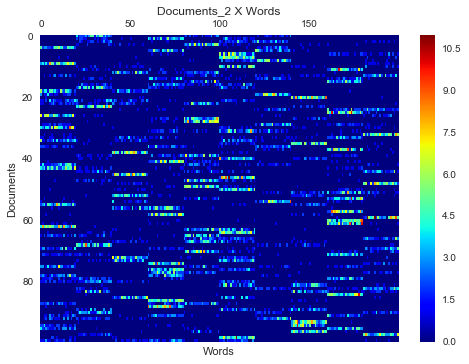

In [4]:
dfs, vocab = gen.generate_input_df(K, vocab_size, document_length, n_docs, copies)

In [5]:
print vocab[0:10]

['word_0' 'word_1' 'word_2' 'word_3' 'word_4' 'word_5' 'word_6' 'word_7'
 'word_8' 'word_9']


<h2>2. Run LDA</h2>

In [6]:
analysis = MultifileAnalysis()
analysis.load_synthetic(dfs, vocab)

In [10]:
n_samples = 100
n_burn = 0
n_thin = 1
lda = analysis.run(K, alpha, beta, n_burn, n_samples, n_thin)

Initialising 
 - file 0 ..........
 - file 1 ..........
 - file 2 ..........

Using Numpy for multi-file LDA sampling
Sample      1 ..  Log likelihood = -234829.600 
Sample      2 ..  Log likelihood = -222203.137 
Sample      3 ..  Log likelihood = -200340.863 
Sample      4 ..  Log likelihood = -173750.242 
Sample      5 ..  Log likelihood = -153719.024 
Sample      6 ..  Log likelihood = -141825.731 
Sample      7 ..  Log likelihood = -133039.508 
Sample      8 ..  Log likelihood = -127208.100 
Sample      9 ..  Log likelihood = -124277.380 
Sample     10 ..  Log likelihood = -122614.955 
Sample     11 ..  Log likelihood = -121385.802 
Sample     12 ..  Log likelihood = -120845.900 
Sample     13 ..  Log likelihood = -120567.290 
Sample     14 ..  Log likelihood = -120469.504 
Sample     15 ..  Log likelihood = -120367.179 
Sample     16 ..  Log likelihood = -120392.403 
Sample     17 ..  Log likelihood = -120384.574 
Sample     18 ..  Log likelihood = -120370.892 
Sample     19 ..  

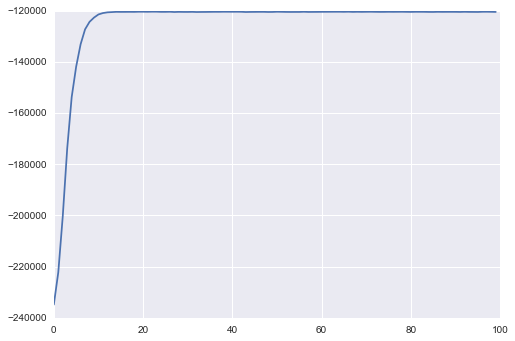

In [11]:
plt.plot(lda.log_likelihoods)

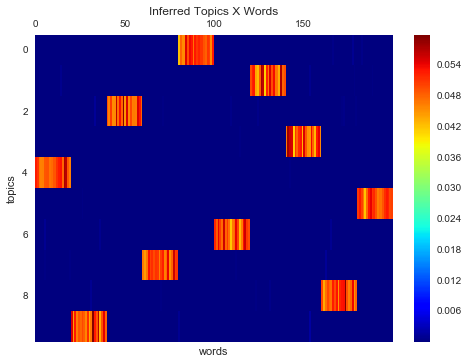

In [12]:
gen._plot_nicely(lda.topic_word_, 'Inferred Topics X Words', 'words', 'topics')

In [16]:
viz = MultifileLDAViz(lda)

,file,topic,alpha
0,0,0,0.108070
1,0,1,0.093635
2,0,2,0.109451
3,0,3,0.115726
4,0,4,0.075749
5,0,5,0.072961
6,0,6,0.122221
7,0,7,0.103271
8,0,8,0.083408
9,0,9,0.115507


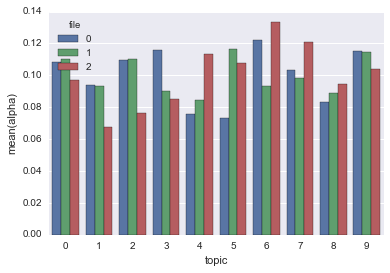

In [19]:
viz.plot_e_alphas()